# 10339 - Catalysis: Homework \#2 Solutions
## Free Energies, Surface Kinetics, and Rate Limiting Steps

Recall the CO oxidation reaction:
$$2 \text{CO(g)}+\text{O}_2 (\text{g}) \rightleftharpoons 2 \text{CO}_2 (\text{g})$$

with the mechanism: 

1. $$\text{CO(g) + *} \rightleftharpoons \text{CO*}$$
2. $$\text{O}_2\text{(g) + 2*} \rightleftharpoons 2\text{O*}$$
3. $$\text{CO* + O*} \rightleftharpoons \text{CO}_2\text{(g) + 2*}$$

You can use the following simple assumptions for this reaction (and others in the course): 

(a) The enthalpy of each species may be approximated by the electronic energy given by CatApp. 

(b) The entropy of gas-phase species may be approximated by 0.002 eV/K. 

(c) The entropy of surface-bound species (adsorbates and transition-states) may be neglected. 

(d) Pre-exponential factors may be approximated by $A = k_{B}T/h$. 

CO oxidation often takes place at high temperatures and near-atmospheric pressure. Use $T=600$ K, $P_{CO} = 0.2$ bar, $P_{O_2} = 0.7$ bar, $P_{CO_2} = 0.1$ bar as the reaction conditions for this problem. 

## 1)

Using the assumptions outlined above, create a free energy diagram for the CO oxidation reaction for the (111) facet of each of the metals from HW1 (Ru, Rh, Pt, Pd, Cu, Au). For reaction (1), assume that the transition state is in the gas phase. For reactions (2) and (3), assume that the transition state is adsorbed.

### Solution

Recall Homework 1 Problem 1, where we have the absolute energy difference for the three elementary reactions. Now, we can apply the gas-phase entropy correction of 1.2 eV (at 600 K) if necessary. We'll use Pt(111) as an example.


If CatApp is used manually:

In [1]:
import pandas as pd

df_table={'eV':['Energies','Entropy correction','Free Energies'],
          'E_1':[-1.2,1.2,0.0],
          'E_1a':[0.00,0.0,0.00],
          'E_2':[-1.5,1.2,-0.3],
          'E_2a':[0.62,1.2,1.82],
          'E3':[-0.96,-1.2,-2.16],
          'E_3a':[0.72,0.0,0.72]}
display(pd.DataFrame(df_table))

,eV,E_1,E_1a,E_2,E_2a,E3,E_3a
0,Energies,-1.2,0.0,-1.5,0.62,-0.96,0.72
1,Entropy correction,1.2,0.0,1.2,1.20,-1.20,0.00
2,Free Energies,0.0,0.0,-0.3,1.82,-2.16,0.72


A small note about 
$$\Delta G_{1,a} = max(0, G_{1}) = max(0, 0) = 0.0$$
this expression is necessary because the reaction has no additional barrier above the reaction energy - recall that if a reaction is downhill, $G_a$ has to be at least 0, and if the reaction is uphill, $G_a$ has to be at least the reaction energy. The more general expression  would be $G_{rxn,a} = max(0, G_{rxn,a}, G_{rxn})$, which is applicable to $G_{2,a}$ and $G_{3,a}$, as well, but is omitted because on Pt(111), these $\Delta G_{rxn,a}$s are always greater than 0 and $\Delta G_{rxn}$.  This may not be the case for all surfaces or reactions. 

Now, we have the reaction free energies for Pt(111), and we can calculate the reaction free energies for the other surfaces in much the same way.

If CatApp is used automatically:

,Reactions,Ru(111),Rh(111),Pt(111),Pd(111),Cu(111),Au(111)
0,CO + * -> CO*,-0.44,-0.40,-0.04,-0.19,0.84,1.30
1,[CO + * -> CO*]TS,0.00,0.00,0.00,0.00,0.84,1.30
2,CO + * -> CO*,-0.44,-0.40,-0.04,-0.19,0.84,1.30
3,[CO + * -> CO*]TS,0.00,0.00,0.00,0.00,0.84,1.30
4,O2 + 2* -> 2 O*,-3.67,-2.43,-0.29,-0.43,-1.39,1.69
5,[O2 + 2* -> 2O-O*]TS,1.20,1.20,1.82,1.81,1.21,3.69
6,CO* + O* -> CO2 + 2*,-0.07,-0.73,-2.16,-1.94,-2.49,-4.49
7,[CO* + O* -> O-CO* + *]TS,1.30,1.21,0.72,1.10,0.53,0.09
8,CO* + O* -> CO2 + 2*,-0.07,-0.73,-2.16,-1.94,-2.49,-4.49
9,[CO* + O* -> O-CO* + *]TS,1.30,1.21,0.72,1.10,0.53,0.09


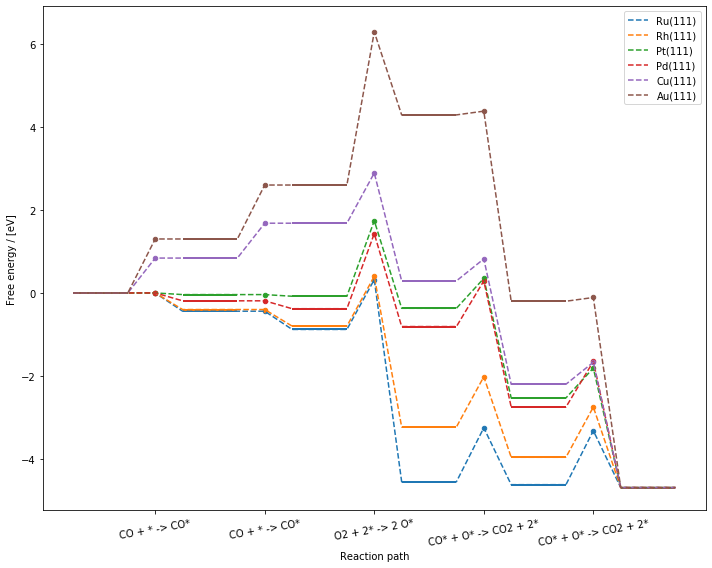

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from ase.db import connect
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import pickle
import copy

# initial energy
start=0
# Temperature
T=600
# Entropy change for the reaction and for the TS
S_de=np.array([0.0-0.002,0.0-0.002,0.0-0.002,0.002-0.0,0.002-0.0])
S_ea=np.array([0.002-0.002,0.002-0.002,0.0-0.002,0.0-0.0,0.0-0.0])

#energies=[-1.24,0.0,-1.24,0.0,-1.49,0.62,-0.96,0.72,-0.96,0.72]

# Use the results from HW1
input_df=pickle.load(open('HW1_energies.pkl','rb'))
# The reactions that will be plotted. Every second is the TS!!!
Reactions=copy.deepcopy(input_df['Reactions'])
# Add the entropy change
for key in input_df:
    if key!='Reactions':
        data=np.array(input_df[key])
        data[::2]=data[::2]-T*S_de
        data[1::2]=data[1::2]-T*S_ea
        max_ea=np.array([[0]*len(data[::2]),data[::2],data[1::2]])
        data[1::2]=np.max(max_ea,axis=0)
        input_df[key]=data
        
# Show the free energies for each surface  
input_df=pd.DataFrame(input_df)
display(input_df)
# Save the free energies
pickle.dump(input_df,open('HW2_free.pkl','wb'))


def energy_diagram_data(DE,Ea,start):
    'Convert the data so it can be used for the energy diagram'
    energy=start
    x=[]
    E=[]
    x_without=[]
    E_without=[]
    for i in range(len(DE)):
        x.extend([2*i,2*i+1])
        x_without.extend([2*i,2*i+1])
        E.extend([energy,energy])
        E_without.extend([energy])
        xin=2*i+1.5
        Ein=Ea[i]+energy
        x.append(xin)
        E.append(Ein)
        energy+=DE[i]
    x.extend([2*i+2,2*i+3])
    x_without.extend([2*i+2,2*i+3])
    E.extend([energy,energy])
    E_without.extend([energy])
    return x,E,x_without,E_without

def energy_diagram_plot(input_df,start=0,ylabel='Reaction energy',rotation=10):
    'Plot the energy diagram from the input data'
    plt.figure(figsize=(10,8))
    for key in input_df:
        if key=='Reactions':
            xticks=[2*i+1.5 for i in range(len(input_df[key][::2]))]
            plt.xticks(xticks,input_df[key][::2],rotation=rotation)
        else:
            DE=input_df[key][::2].tolist()
            Ea=input_df[key][1::2].tolist()
            x,E,x_without,E_without=energy_diagram_data(DE,Ea,start)
            p=plt.plot(x,E,label=key,linestyle='--')
            color=p[0].get_color()
            plt.scatter(x[2::3],E[2::3],color=color,s=20)
            plt.hlines(E_without,x_without[::2],x_without[1::2],color=color,linewidth=2)
    plt.xlabel('Reaction path')
    plt.ylabel(ylabel)
    plt.legend(bbox_to_anchor=(1.0,1.0))
    plt.tight_layout()
    plt.show()
    pass
    
    
energy_diagram_plot(input_df,start=start,ylabel='Free energy / [eV]') 


A small note: The activation energy must be the largest of the activation barrier, the reactant energy, or the product energy, $G_{rxn,a}=max(0,G_{rxn,a},G_{rxn})$.

## 2) 

Write the reaction expressions (rate as a function of rate constants, pressures, and coverages) for each of the elementary steps.


### Solution
\begin{align}
R_1 =& r_1-r_{-1} =& k_1 P_{CO} \theta_* - k_{-1}\theta_{CO} \notag \\
R_2 =& r_2-r_{-2} =& k_2 P_{O_2}\theta_*^2 - k_{-2} \theta_O^2 \notag \\
R_3 =& r_3-r_{-3} =& k_3 \theta_{CO} \theta_O - k_{-3} P_{CO_2} \theta_*^2 \notag
\end{align}

## 3)

Use the quasi-equilibrium approximation to solve for the CO oxidation rate as a function of pressure, rate constants, and equilibrium constants. Solve under three different assumptions:
1. CO adsorption (step 1) is rate limiting
2. O$_2$ adsorption (step 2) is rate limiting
3. O-CO coupling (step 3) is rate limiting

### Solution

For each of the three different assumptions, we will apply the quasi-equilibrium approximation to solve for $R(P,k,K)$

#### 1. Step 1 is rate-limiting. Steps 2 and 3 are in equilibrium.


First, steps 2 and 3 are in equilibrium:
$$R_2=k_2\ P_{O_2\ }\ \theta_\ast^2-k_{-2}\ \theta_O^2=0$$
$$R_3=k_3\theta_{CO}\theta_O-k_{-3} P_{CO_2}\theta_\ast^2=0$$

From $R_2$:
$$\lambda_O=\frac{\theta_O}{\theta_\ast}=\sqrt{\frac{k_2}{k_{-2}} P_{O_2}}=\sqrt{K_2 P_{O_2}}$$

From $R_3$:
$$\lambda_{CO}=\frac{\theta_{CO}}{\theta_\ast}=\frac{k_{-3} P_{CO_2}\theta_\ast}{k_3\theta_O}=\frac{P_{CO_2}}{K_3\lambda_O}=\frac{P_{CO_2}}{K_3\sqrt{K_2 P_{O_2}}}$$

From equation 5.40 in the book:
$$\theta_\ast=\frac{1}{1+\sum_{i\neq\ast}\lambda_i}=\frac{1}{1+\lambda_O+\lambda_{CO}}=\frac{1}{1+\sqrt{K_2 P_{O_2}}+\frac{P_{CO_2}}{K_3\sqrt{K_2 P_{O_2}}}}$$

Then, the coverage of CO on the surface can be found:
$$\theta_{CO}=\lambda_{CO}\theta_\ast=\frac{\frac{P_{CO_2}}{K_3\sqrt{K_2 P_{O_2}}}}{1+\sqrt{K_2 P_{O_2}}+\frac{P_{CO_2}}{K_3\sqrt{K_2 P_{O_2}}}}$$

At last, the reaction rate is the rate-limiting step 1:
\begin{align}
R=&R_1=k_1 P_{CO}\theta_\ast-k_{-1}\theta_{CO} \notag \\
=&\frac{k_1 P_{CO}}{1+\sqrt{K_2 P_{O_2}}+\frac{P_{CO_2}}{K_3\sqrt{K_2 P_{O_2}}}}-k_{-1}\frac{\frac{P_{CO_2}}{K_3\sqrt{K_2 P_{O_2}}}}{1+\sqrt{K_2 P_{O_2}}+\frac{P_{CO_2}}{K_3\sqrt{K_2 P_{O_2}}}} \notag \\
=&\frac{k_1 P_{CO}-k_{-1}\frac{P_{CO_2}}{K_3\sqrt{K_2 P_{O_2}}}}{1+\sqrt{K_2 P_{O_2}}+\frac{P_{CO_2}}{K_3\sqrt{K_2 P_{O_2}}}} \notag
\end{align}

#### 2. Step 2 is rate-limiting. Steps 1 and 3 are in equilibrium.

\begin{align}
R=& 2R_2=2 (k_2 P_{O_2} \theta_*^2 - k_{-2} \theta_{O_2}^2) \notag \\
=&2\frac{k_2 P_{O_2\ }}{\left(1+\frac{P_{CO_2}}{K_3 K_1 P_{CO}}+K_1 P_{CO}\right)^2}-2k_{-2}\left(\frac{\frac{P_{CO_2}}{K_3 K_1 P_{CO}}}{1+\frac{P_{CO_2}}{K_3 K_1 P_{CO}}+K_1 P_{CO}}\right)^2 \notag \\
=& 2\frac{k_2 P_{O_2\ }-k_{-2}\left(\frac{P_{CO_2}}{K_3 K_1 P_{CO}}\right)^2}{\left(1+\frac{P_{CO_2}}{K_3 K_1 P_{CO}}+K_1 P_{CO}\right)^2} \notag
\end{align}

Note that we double the rate of $R_2$ for stoichiometric parity: one turnover of $R_2$ makes twice as much product as one turnover of $R_1$ or $R_3$. Alternatively, we could halve the rates of the other two cases.

#### 3. Step 3 is rate-limiting. Steps 1 and 2 are in equilibrium.

\begin{align}
R=&R_3 \notag \\
=&k_3\frac{K_1 P_{CO}}{1+\sqrt{K_2 P_{O_2}}+K_1 P_{CO}}\frac{\sqrt{K_2 P_{O_2}}}{1+\sqrt{K_2 P_{O_2}}+K_1 P_{CO}}-\frac{k_{-3} P_{CO_2}}{\left(1+\sqrt{K_2 P_{O_2}}+K_1 P_{CO}\right)^2} \notag \\
=&\frac{k_3 K_1 P_{CO}\sqrt{K_2 P_{O_2}}-k_{-3} P_{CO_2}}{\left(1+\sqrt{K_2 P_{O_2}}+K_1 P_{CO}\right)^2} \notag
\end{align}


## 4)

Use the reaction and activation free energies for Pt(111) in Problem 1 in order to calculate the rate and equilibrium constants needed in Problem 2. Substitute in order to find the rate of CO oxidation on Pt(111) under each assumption in Problem 3. Which assumption is valid for Pt(111)? Would you expect this to be valid for all metals?

### Solution

With the 3 rate equations we found in Problem 3, all we need to do now is to calculate the Ks and ks (both forward and backward) on Pt(111).


If CatApp is used manually and the total reaction energy used is:

We can then just plug everything in very carefully, and see what pops out:
\begin{eqnarray}
    k_B = 8.6173\times10^{-5}\text{eVK$^{-1}$} \nonumber \\
    T = 600\text{K} \nonumber \\
    h = 4.1357\times10^{-15} \text{eVs} \nonumber \\
    k_{1} = \frac{k_BT}{h}\exp{\left(\frac{-\Delta G_{1,a}}{k_BT}\right)}=1.25\times10^{13}\exp{(\frac{-0.0}{0.0517})}=\bf{1.25\times10^{13}s^{-1}} \notag \\
    K_1 = \exp{(\frac{-\Delta G_1}{k_BT})} = \exp{(\frac{-0.0}{0.0517})} = \bf{1} \notag \\
    k_{-1} = \frac{k_1}{K_1} = \bf{1.25\times10^{13}s^{-1}} \notag \\
    k_2 = \frac{k_BT}{h}\exp{\left(\frac{-\Delta G_{2,a}}{k_BT}\right)}=1.25\times10^{13}\exp{(\frac{-1.82}{0.0517})}=\bf{6.433\times10^{-3}s^{-1}} \notag \\
    K_2 = \exp{(\frac{-\Delta G_2}{k_BT})} = \exp{(\frac{0.3}{0.0517})} = \bf{331.047} \notag \\
    k_{-2} = \frac{k_2}{K_2} = \bf{1.95\times10^{-5}s^{-1}} \notag \\
    k_3 = \frac{k_BT}{h}\exp{\left(\frac{-\Delta G_{3,a}}{k_BT}\right)} =1.25\times10^{13}\exp{(\frac{-0.71}{0.0517})}=\bf{1.35907\times10^{7}s^{-1}} \notag \\
    K_3 = \exp{(\frac{-\Delta G_3}{k_BT})} = \exp{(\frac{2.16}{0.0517})} = \bf{1.3906\times10^{18}} \notag \\
    k_{-3} = \frac{k_3}{K_3} = \bf{9.773\times10^{-12}s^{-1}} \notag
\end{eqnarray}
Plugging everything in, we get \begin{eqnarray}
    R(i) =& 1.54\times10^{11}s^{-1} \notag \\
    R(ii) =& 6.27\times10^{-3}s^{-1} \notag \\
    R(iii) =& 1.26\times10^{5}s^{-1} \notag
\end{eqnarray}

Again, depending on how you defined "CO oxidation", you may have ended up with rates that are half of the above. 


As the assumption which obtains the lowest rate, assumption (ii) is valid for Pt(111).  We can verify that this makes logical
 sense when we look at the free energy diagram for Pt(111) and see that indeed, oxygen dissociation has the highest barrier. 
this would likely not be the case for all metals and surfaces.  Even without doing the full kinetic analysis on each of the
metals, we can see that Ru(111) has a higher barrier for step 3 than step 2, which might result in it having a different
rate-determining step.

If CatApp is used automatically:

In [3]:
# Temperature
T=600 # K
# The surface
metals=['Pt(111)']

# Boltzmann constant
kB=8.617333262145*10**(-5) # eV/K
# Planck constant
h=4.135667696*10**(-15) # eV*s

kBT=kB*T
# Prefactor in TS theory
A=kBT/h

# Load data from Problem 1.
input_df=pickle.load(open('HW2_free.pkl','rb'))

def round_num(val,r=2):
    'Round a value'
    if not isinstance(val,(float,int)):
        val=val.item(0)
    return np.format_float_scientific(val,unique=False, precision=r)

def rate_eq(Ga,G,A,kBT):
    """Calculate the forward and backward reaction rate 
       and the equilibrium constants from activation free energy and free energy"""
    k=A*np.exp(-Ga/kBT)
    Ga_inv=Ga-G
    kinv=A*np.exp(-Ga_inv/kBT)
    K=np.exp(-G/kBT)
    return k,kinv,K

def rate_eq_visualize(input_df,metals):
    'Calculate reaction reaction rate and the equilibrium constants and show them'
    pd_total={}
    for metal in metals:
        pd_dict={'Reactions':input_df['Reactions'][::2].values,'k':[],'k_inv':[],'K':[],'K=k/k_inv':[]}
        G=input_df[metal][::2].values
        Ga=input_df[metal][1::2].values
        print('{} surface:'.format(metal))
        for r,react in enumerate(input_df['Reactions'][::2]):
            # Calculate rate and equilibrium constants 
            k,kinv,K=rate_eq(Ga[r],G[r],A,kBT)
            pd_dict['k'].append(round_num(k))
            pd_dict['k_inv'].append(round_num(kinv))
            pd_dict['K=k/k_inv'].append(round_num(k/kinv))
            pd_dict['K'].append(round_num(K))
        # Show table 
        pd_dict=pd.DataFrame(pd_dict)
        display(pd_dict)
        pd_total[metal]=pd_dict
    return pd_total

pd_total=rate_eq_visualize(input_df,metals)
pickle.dump(pd_total,open('rate_constants_HW2.pkl','wb'))


Pt(111) surface:


,Reactions,k,k_inv,K,K=k/k_inv
0,CO + * -> CO*,1.25e+13,5.77e+12,2.17e+00,2.17e+00
1,CO + * -> CO*,1.25e+13,5.77e+12,2.17e+00,2.17e+00
2,O2 + 2* -> 2 O*,6.45e-03,2.36e-05,2.73e+02,2.73e+02
3,CO* + O* -> CO2 + 2*,1.12e+07,8.05e-12,1.39e+18,1.39e+18
4,CO* + O* -> CO2 + 2*,1.12e+07,8.05e-12,1.39e+18,1.39e+18


Now, the rate can be calculated:

In [4]:
# Partial pressures
pco,po2,pco2=0.2,0.7,0.1
reactants=[pco,po2,pco2]

def R1(k1,k1i,K1,K2,K3,pco,po2,pco2):
    'Rate of reaction 1'
    cov=(1+np.sqrt(K2*po2)+pco2/(K3*np.sqrt(K2*po2)))
    return (k1*pco-k1i*pco2/(K3*np.sqrt(K2*po2)))/cov

def R2(k2,k2i,K1,K2,K3,pco,po2,pco2):
    'Rate of reaction 2'
    cov=(1+pco2/(K3*K1*pco)+K1*pco)
    return 2*(k2*po2-k2i*(pco2/(K3*K1*pco))**2)/cov**2

def R3(k3,k3i,K1,K2,K3,pco,po2,pco2):
    'Rate of reaction 3'
    cov=(1+np.sqrt(K2*po2)+K1*pco)
    return (k3*K1*pco*np.sqrt(K2*po2)-k3i*pco2)/cov**2

def round_num(val,r=3):
    'Round a value'
    if not isinstance(val,(float,int)):
        val=val.item(0)
    return np.format_float_scientific(val,unique=False, precision=r)

def rate_table(reactants,rates_list,react_index,pd_total):
    'Get all the rates and visualize them in a table'
    reaction_label=['Rate {} is limiting'.format(i) for i in range(1,len(react_index)+1)]
    pd_dict={'Rate limiting':reaction_label+['Rate']}
    rates_total=[]
    for metal in pd_total:
        K_list=pd_total[metal]['K'][react_index]
        print('{} surface:'.format(metal))
        pd_dict[metal]=[]
        for i in react_index:
            argu=[pd_total[metal]['k'][i],pd_total[metal]['k_inv'][i]]+K_list.tolist()+reactants
            argu=map(float,argu)
            R=rates_list[i](*argu)
            print('Rate of step {} = {}'.format(i,round_num(R)))
            pd_dict[metal].append(np.log10(R))
        R=min(pd_dict[metal])
        pd_dict[metal].append(R)
    return pd.DataFrame(pd_dict)


# Reaction indices with pressures
rates_list=[R1,R1,R2,R3,R3]
react_index=[1,2,3]

# Load data from first part Problem 4.
pd_total=pickle.load(open('rate_constants_HW2.pkl','rb'))
# Calculate and show the rates
pd_dict=rate_table(reactants,rates_list,react_index,pd_total)
pickle.dump(pd_dict,open('rates_HW2.pkl','wb'))
display(pd_dict)

Pt(111) surface:
Rate of step 1 = 1.686e+11
Rate of step 2 = 4.391e-03
Rate of step 3 = 2.886e+05


,Rate limiting,Pt(111)
0,Rate 1 is limiting,11.226978
1,Rate 2 is limiting,-2.357411
2,Rate 3 is limiting,5.460349
3,Rate,-2.357411


The rates are in log10 scale!